## 确认Python的版本

确认Python版本的方法有三种，一种是在命令界面输入
```
python --version
```

或者
```
python3 --version
```

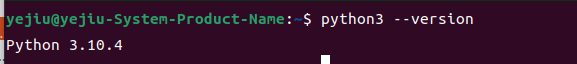

第二种方法是直接进入python开发环境：

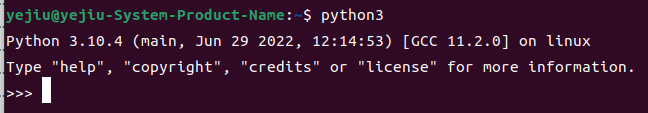

第三种方法是使用Python内置的sys模块来查询相关的值：

In [3]:
import sys
print(sys.version_info)
print(sys.version)

sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)
3.10.4 (main, Jun 29 2022, 12:14:53) [GCC 11.2.0]


## 遵循 PEP8 风格

PEP8 是《Python Enhancement Proposal #8》的缩写。

关于空白的建议：
1. 使用空格而不是tab
2. 和语法相关的每一次都使用4个空格来来表示
3. 对于占据多行的长表达式，除了首行之外其余的各行都需要在通常的缩进级别之上再加上4个空格
4. 文件中的函数与类之间应该使用一个空行个开
5. 在使用下标来获取元素，调用函数或者给关键字参数赋值的时候，不要再两旁添加空格
6. 为变量赋值的时候，赋值符号的左侧和右侧应该各自写上一个空格，并且写一个就可以了


关于命名的建议：
1. 函数，变量，或者属性，应该使用小写字母来拼写，个个单词之间可以使用下划线来进行连接。
2. 受保护的实例属性，应该以单个下划线开头
3. 四有的实例属性，应该以两个下划线开头
4. 类与异常，应该以买个单词首字母均大写的形式来进行命名

关于表达式和语句的建议：
1. 采用 if a is not b 而不是 if not a is b，也就是说不要将否定词放在整个表达式的前面
2. 不要使用if len(somelist) == 0 来判断somelist是否为空，而是直接使用if not somelist，这会假定：空值将自动评估为False
3. Python的if语句会默认把非空值判定为True，所以需要判定somelist是否存在着值，也应当使用if somelist
4. 尽量不要使用当行的if语句，for循环或者while循环，而是应该将这些语句分成多行来写
5. import的时候顺序为：标准模块，第三方模块和自用模块；并且每个部分的模块按照模块的首字母进行排序

## 了解 bytes, str 和 unicode 的区别

Python有两种类型可以表示字符序列：一种是bytes，另一种是str。

bytes实例包含的是原始数据，也就是8位的无符号值。(通常是按照ASCII编码标准来进行显示)。

In [4]:
a = b'h\x65110'
print(list(a))
print(a)

[104, 101, 49, 49, 48]
b'he110'


str实例包含的是Unicode码点（code point，也就做代码点），这些码点与人类语言中的文本字符相对应。

In [6]:
a = 'a\u0300 propos'
print(list(a))
print(a)

['a', '̀', ' ', 'p', 'r', 'o', 'p', 'o', 's']
à propos


## 使用支持插值的f-string来替代c风格的格式字符串与str.format方法

Python语言中最常用的字符串格式化方式是采用 % 格式化操作符。

这个操作符左边的文本模块叫作格式字符串（format string），我们可以再操作符右边写上某个或者多个值所构成的元组，用来替代格式字符串里的相关符号。

In [7]:
a = 0b10111011
b = 0xc5f

print("Binary is %d, hex is %d" % (a, b))

Binary is 187, hex is 3167


格式字符串里面可以出现%d这样的格式说明符，这些说明符的意思是：%右边的对应数值会以这样的格式来替换这一部分内容。

格式说明的写法来自于c语言的printf函数，Python语言和一些别的编程语言都依照那套写法来规定自己的格式字符串。

但是C风格的格式字符串，再Python中有四个缺点。

In [8]:
key = 'my_value'
value = 1.234
formatted = '%-10s = %.2f' % (key, value)

print(formatted)

my_value   = 1.23


如果我们将key和value进行位置互换：

In [9]:
reordered_tuple = '%-10s = %.2f' % (value, key)

TypeError: must be real number, not str

可以发现会报错。

同理：

In [10]:
recordered_tuple = '%.2f = %-10s' % (key, value)

TypeError: must be real number, not str

也会报错。

第二个缺点是，再填充模板之前，经常需要对准备填写进入的这个值稍微做一些处理，但是这样以来表达式可能会边的非常的长。

In [11]:
pantry = [('avocados', 1.25),
          ('bananas', 2.5),
          ('cherries', 15)]

for i, (item, count) in enumerate(pantry):
    print('#%d: %-10s = %.2f' % (i, item, count))

#0: avocados   = 1.25
#1: bananas    = 2.50
#2: cherries   = 15.00
